In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/my-data/Customer Loyalty History.csv
/kaggle/input/my-data/Airline Loyalty Data Dictionary.csv
/kaggle/input/my-data/Customer Flight Activity.csv


# Customer loyalty program data from Northern Lights Air (NLA) in Canada Analysis and Customer Lifetime Value(CLV) Prediction

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 50)

In [3]:
df_activity=pd.read_csv('/kaggle/input/my-data/Customer Flight Activity.csv')
df_loyality=pd.read_csv('/kaggle/input/my-data/Customer Loyalty History.csv')

In [4]:
df_activity.head(3)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0


In [5]:
df_loyality.head(3)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0


# Merging all data

In [6]:
df=df_activity.merge(df_loyality,on='Loyalty Number')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
 10  Country                      405624 non-null  object 
 11  Province                     405624 non-null  object 
 12  City                         405624 non-null  object 
 13 

In [8]:
df.isna().sum()

Loyalty Number                      0
Year                                0
Month                               0
Flights Booked                      0
Flights with Companions             0
Total Flights                       0
Distance                            0
Points Accumulated                  0
Points Redeemed                     0
Dollar Cost Points Redeemed         0
Country                             0
Province                            0
City                                0
Postal Code                         0
Gender                              0
Education                           0
Salary                         102672
Marital Status                      0
Loyalty Card                        0
CLV                                 0
Enrollment Type                     0
Enrollment Year                     0
Enrollment Month                    0
Cancellation Year              355560
Cancellation Month             355560
dtype: int64

# Droping missing values in Cancellation Year& Cancellation& Month&Postal Code and Country because the missing values are more than 85% from all data

In [9]:
df=df.drop(['Cancellation Year','Cancellation Month','Postal Code','Country'],axis=1)

# Completing missing values in Salary column by mean from simple imputer technique

In [10]:
from sklearn.impute import SimpleImputer

# Create an instance of SimpleImputer with the desired strategy
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the salary column and transform the missing values
df['Salary'] = imputer.fit_transform(df[['Salary']])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
 10  Province                     405624 non-null  object 
 11  City                         405624 non-null  object 
 12  Gender                       405624 non-null  object 
 13 

In [12]:
df.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Province,City,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Alberta,Edmonton,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8
1,100018,2017,2,2,2,4,1320,132.0,0,0,Alberta,Edmonton,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8
2,100018,2018,10,6,4,10,3110,311.0,385,31,Alberta,Edmonton,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8
3,100018,2017,4,4,0,4,924,92.0,0,0,Alberta,Edmonton,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8
4,100018,2017,5,0,0,0,0,0.0,0,0,Alberta,Edmonton,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8


# Extracting top 10 customers having the highest average CLV

In [14]:
df.groupby('Loyalty Number')['CLV'].mean().sort_values(ascending=False).head(10)

Loyalty Number
615459    83325.38
652627    83325.38
776187    74228.52
844145    74228.52
767366    73225.96
592003    73225.96
838263    67907.27
680886    67907.27
179870    66025.75
495253    66025.75
Name: CLV, dtype: float64

# Extracting top 10 customers having the highest Total Flights number

In [15]:
df.groupby('Loyalty Number')['Total Flights'].sum().sort_values(ascending=False).head(10)

Loyalty Number
336882    448
775768    400
464187    399
255836    395
512296    392
736504    383
279419    379
215508    375
876062    372
615561    372
Name: Total Flights, dtype: int64

# Exploratory Data Analysis(EDA)

<Axes: xlabel='City'>

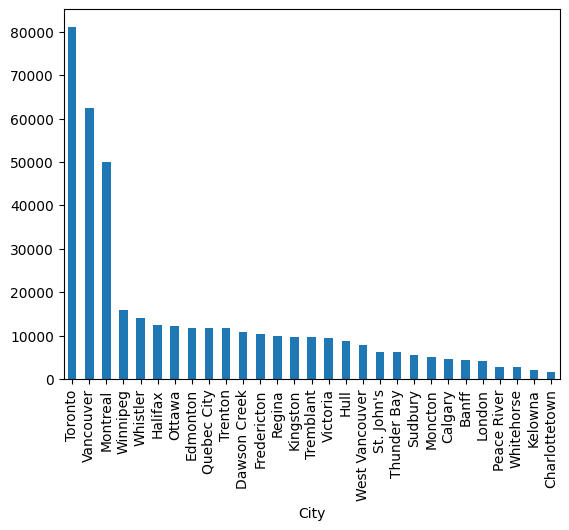

In [16]:
df['City'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

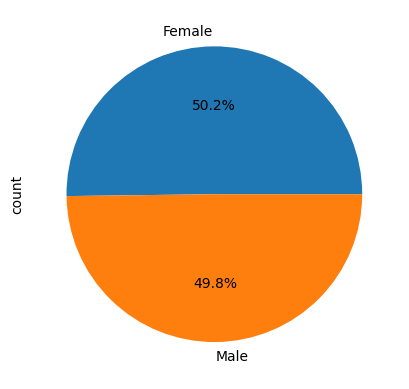

In [17]:
df['Gender'].value_counts().plot(kind='pie',autopct='%1.1f%%')

<Axes: ylabel='count'>

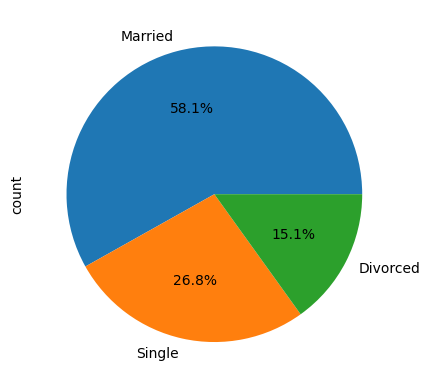

In [18]:
df['Marital Status'].value_counts().plot(kind='pie',autopct='%1.1f%%')

# Most customers are from married people

<Axes: xlabel='Loyalty Card'>

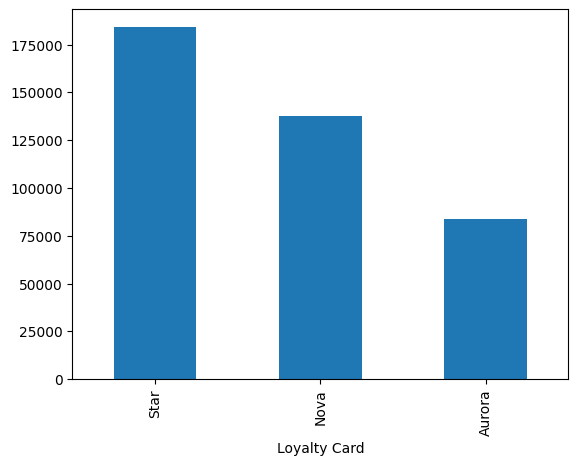

In [19]:
df['Loyalty Card'].value_counts().plot(kind='bar')

# The highest selling loyality card is star and the lowest is aurora


<Axes: xlabel='Education'>

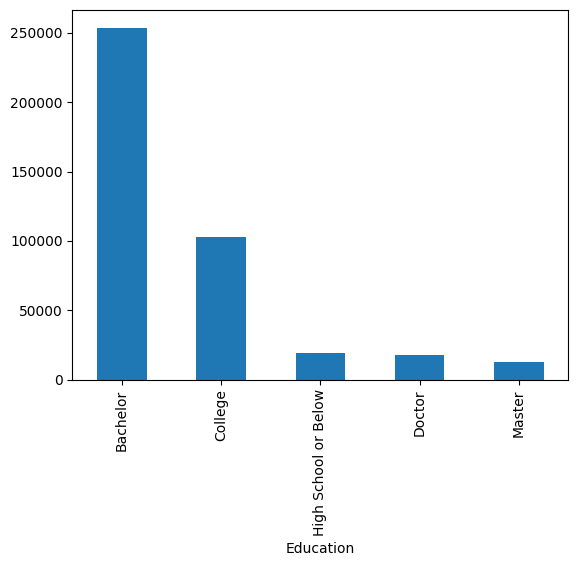

In [20]:
df['Education'].value_counts().plot(kind='bar')

# The most customers are having Bachelor degree 

<Axes: ylabel='count'>

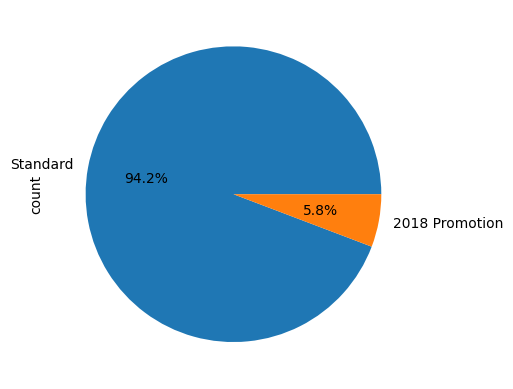

In [21]:
df['Enrollment Type'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [22]:
df=df.drop('Loyalty Number',axis=1)

In [23]:
df['Enrollment Type'].value_counts()

Enrollment Type
Standard          382200
2018 Promotion     23424
Name: count, dtype: int64

# Converting Gender and Enrollment Type columns to numerical columns 

In [24]:
df['Gender']=df['Gender'].replace({'Female':0,'Male':1})
df['Enrollment Type']=df['Enrollment Type'].replace({'Standard':0,'2018 Promotion':1})

# Converting categorical features to numerical by LabelEncoder to can use them in prediction.

In [25]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
df['Province']=labelencoder.fit_transform(df['Province'])
df['City']=labelencoder.fit_transform(df['City'])
df['Education']=labelencoder.fit_transform(df['Education'])
df['Marital Status']=labelencoder.fit_transform(df['Marital Status'])
df['Loyalty Card']=labelencoder.fit_transform(df['Loyalty Card'])

# Extracting the correlations between all features and CLV column to determine the features that have the highest influence on CLV feature. 

In [26]:
df.corr()

,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Province,City,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month
Year,1.000000e+00,-5.737962e-16,0.044510,0.021615,0.042550,0.056140,0.075208,0.017633,0.017624,3.580244e-13,2.043782e-13,-2.834385e-13,-1.086689e-13,-3.284742e-13,-1.434437e-13,-1.707973e-13,1.488269e-13,3.697842e-13,-9.927540e-14,1.890369e-13
Month,-5.737962e-16,1.000000e+00,0.082133,0.064492,0.086353,0.076345,0.054178,0.019408,0.019315,-2.307385e-16,3.152263e-16,1.496595e-16,1.626831e-16,3.736994e-16,-1.916412e-16,-2.915448e-16,-2.556763e-17,3.445648e-16,3.564005e-16,1.100554e-16
Flights Booked,4.451043e-02,8.213330e-02,1.000000,0.502500,0.961344,0.767457,0.760279,0.188232,0.188242,-3.461029e-03,-3.605528e-04,4.709682e-03,5.134502e-03,5.010200e-03,4.303062e-03,6.687882e-04,-2.963577e-03,-4.375946e-02,-1.534545e-01,-3.152846e-02
Flights with Companions,2.161493e-02,6.449206e-02,0.502500,1.000000,0.721136,0.517979,0.511090,0.334325,0.334385,-2.193267e-03,2.562142e-03,2.824802e-03,2.837649e-03,2.149953e-03,3.115338e-03,1.160475e-03,-2.583089e-03,-2.955071e-02,-9.701219e-02,-1.964384e-02
Total Flights,4.255050e-02,8.635348e-02,0.961344,0.721136,1.000000,0.779935,0.771989,0.257307,0.257334,-3.471862e-03,5.270724e-04,4.673549e-03,5.018052e-03,4.699432e-03,4.440250e-03,9.054923e-04,-3.197399e-03,-4.447611e-02,-1.538608e-01,-3.152018e-02
Distance,5.614031e-02,7.634481e-02,0.767457,0.517979,0.779935,1.000000,0.994564,0.224261,0.224283,-3.625086e-03,1.791207e-03,3.007797e-03,5.852958e-03,6.951055e-03,3.229075e-03,2.200674e-03,-4.252336e-03,-4.926070e-02,-1.652630e-01,-3.441586e-02
Points Accumulated,7.520848e-02,5.417842e-02,0.760279,0.511090,0.771989,0.994564,1.000000,0.223230,0.223264,-3.455821e-03,1.759084e-03,2.732983e-03,5.157300e-03,6.802496e-03,2.804999e-03,-1.224942e-02,-1.074624e-03,-4.927501e-02,-1.646450e-01,-3.389278e-02
Points Redeemed,1.763278e-02,1.940776e-02,0.188232,0.334325,0.257307,0.224261,0.223230,1.000000,0.999972,2.510058e-04,1.888936e-04,-3.866819e-04,1.889041e-03,2.450038e-03,-2.646639e-04,3.822948e-04,-3.038249e-04,-1.623785e-02,-4.786677e-02,-8.689322e-03
Dollar Cost Points Redeemed,1.762408e-02,1.931472e-02,0.188242,0.334385,0.257334,0.224283,0.223264,0.999972,1.000000,2.325534e-04,1.974144e-04,-3.924313e-04,1.902202e-03,2.445316e-03,-2.741657e-04,3.788534e-04,-2.772702e-04,-1.625398e-02,-4.791541e-02,-8.692341e-03
Province,3.580244e-13,-2.307385e-16,-0.003461,-0.002193,-0.003472,-0.003625,-0.003456,0.000251,0.000233,1.000000e+00,-1.558457e-01,9.272205e-03,-1.741454e-03,1.843328e-03,3.133414e-03,7.527903e-03,4.567617e-03,1.521648e-02,1.909355e-03,1.589009e-02


<Axes: >

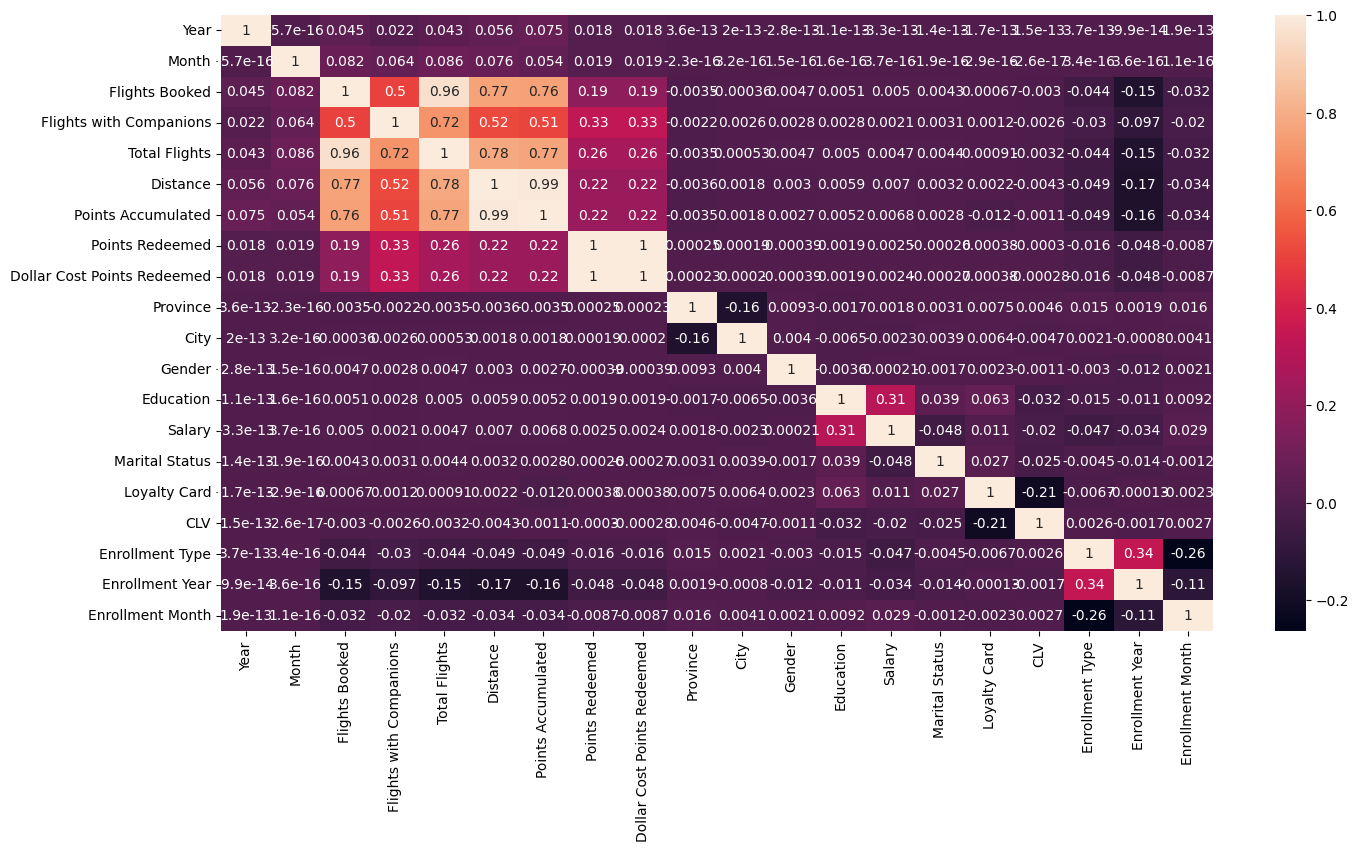

In [27]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True)

In [28]:
df.head()

,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Province,City,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month
0,2017,1,3,0,3,1521,152.0,0,0,0,4,0,0,92552.0,1,0,7919.2,0,2016,8
1,2017,2,2,2,4,1320,132.0,0,0,0,4,0,0,92552.0,1,0,7919.2,0,2016,8
2,2018,10,6,4,10,3110,311.0,385,31,0,4,0,0,92552.0,1,0,7919.2,0,2016,8
3,2017,4,4,0,4,924,92.0,0,0,0,4,0,0,92552.0,1,0,7919.2,0,2016,8
4,2017,5,0,0,0,0,0.0,0,0,0,4,0,0,92552.0,1,0,7919.2,0,2016,8


In [29]:
X=df.drop('CLV',axis=1)
y=df.CLV

# Splitting the data to train and test

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25,stratify=y,random_state=42)

# Scaling all data by MinMaxScaler to increase the prediction accuracy

In [31]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
X_train_scaled=scale.fit_transform(X_train)
X_train_scaled

array([[0.        , 0.        , 0.33333333, ..., 0.        , 0.66666667,
        1.        ],
       [0.        , 0.72727273, 0.38095238, ..., 0.        , 0.83333333,
        0.09090909],
       [1.        , 1.        , 0.28571429, ..., 0.        , 0.5       ,
        0.36363636],
       ...,
       [0.        , 0.90909091, 0.33333333, ..., 0.        , 0.83333333,
        0.27272727],
       [1.        , 1.        , 0.23809524, ..., 0.        , 0.5       ,
        1.        ],
       [1.        , 0.81818182, 0.        , ..., 0.        , 0.16666667,
        0.45454545]])

In [32]:
X_test_scaled=scale.transform(X_test)
X_test_scaled

array([[1.        , 0.        , 0.        , ..., 1.        , 1.        ,
        0.27272727],
       [1.        , 0.09090909, 0.38095238, ..., 0.        , 0.        ,
        0.45454545],
       [1.        , 0.54545455, 0.23809524, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.        , 0.72727273, 0.61904762, ..., 0.        , 0.66666667,
        1.        ],
       [0.        , 0.63636364, 0.        , ..., 0.        , 1.        ,
        0.54545455],
       [0.        , 1.        , 0.04761905, ..., 0.        , 0.16666667,
        0.27272727]])

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Using random forest regressor for CLV prediction

In [34]:
from sklearn.ensemble import RandomForestRegressor
RFR=RandomForestRegressor(n_estimators=300)
RFR.fit(X_train_scaled,y_train)
y_pred=RFR.predict(X_test_scaled)
print(mean_absolute_error(y_pred,y_test))

270.3215078472331


# Using XGB Regressor for CLV prediction

In [35]:
from xgboost import XGBRegressor
XGB=XGBRegressor(n_estimators=1000,learning_rate=1,max_depth=13)
XGB.fit(X_train_scaled,y_train)
y_pred2=XGB.predict(X_test_scaled)
print(mean_absolute_error(y_pred2,y_test))

849.2057255379643


In [36]:
y_pred[:10]

array([ 3115.7       ,  3530.23383333, 15943.436     ,  4621.43349167,
       11638.9       , 33806.78743333,  5674.93586667,  6288.7598    ,
        2916.64466667,  8622.84      ])

In [37]:
y_test.head(10)

245412     3115.70
356677     3472.37
343052    16702.70
137897     4766.37
2895      11638.90
186527    34090.04
395808     5660.13
29135      6301.10
77628      2722.21
287876     8622.84
Name: CLV, dtype: float64

# Comparing between actual and prediction CLV to determine the accuracy and efficiency of prediction

In [38]:
pred_df=pd.DataFrame(y_pred,index=X_test.index,columns=['prediction'])
# Merge the predicted values with the actual test data
merged_df = pd.concat([y_test,pred_df], axis=1)
merged_df=merged_df.rename(columns={'CLV':'Actual'})
merged_df

,Actual,prediction
245412,3115.70,3115.700000
356677,3472.37,3530.233833
343052,16702.70,15943.436000
137897,4766.37,4621.433492
2895,11638.90,11638.900000
...,...,...
74002,3097.92,3130.740467
269131,3919.37,3919.370000
281504,3237.50,3290.053233
28471,8236.92,8236.920000


# As we see the random forest regressor algorithm is the best one for CLV prediction